## Importing Libraries

In [64]:
import tensorflow as tf
from keras.models import Model
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import umap
import seaborn as sns
import numpy as np
import pandas as pd

## Loading MNIST Digit Dataset

Shape of x: (60000, 28, 28)
Shape of y: (60000,)


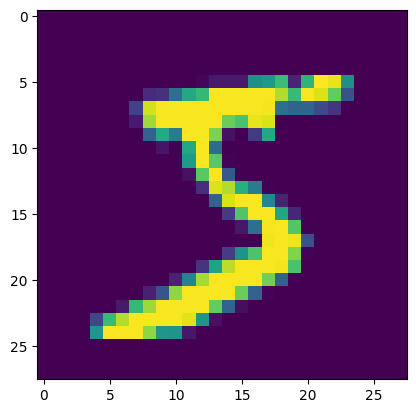

In [65]:
(x, y), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"Shape of x: {x.shape}")
print(f"Shape of y: {y.shape}")

plt.imshow(x[0])
plt.show()

## Standardizing Images

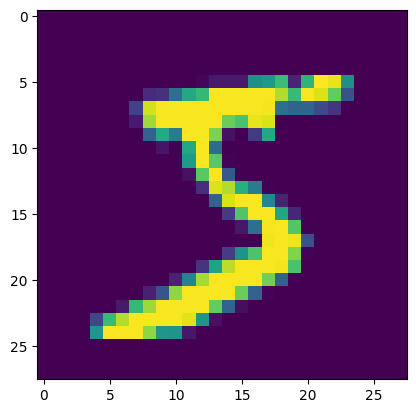

In [66]:
x = x.reshape(x.shape[0], -1) / 255.
x_test = x_test.reshape(x_test.shape[0], -1) / 255.
# x = StandardScaler().fit_transform(x)

plt.imshow(x[0].reshape(28, 28))
plt.show()

## Get first 1000 samples

In [67]:
x = x[:3000]
y = y[:3000]

## Creating Model Architecture

In [ ]:
latent_dim = 2
inp = tf.keras.layers.Input((784,))
encoder = tf.keras.Sequential([
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(2)
])

decoder = tf.keras.Sequential([
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(784)
])

encoded = encoder(inp)
decoded = decoder(encoded)

autoencoder = Model(inp, decoded)
encoder = Model(inp, encoded)

## Training Model

In [69]:
autoencoder.compile(optimizer="adam", loss="mse")
autoencoder.fit(x, x, epochs=500, batch_size=64, shuffle=True)
encoder.save('models/encoder.keras')

Epoch 1/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0640
Epoch 2/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0546
Epoch 3/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0528
Epoch 4/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0508
Epoch 5/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0495
Epoch 6/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0483
Epoch 7/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0475
Epoch 8/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0464
Epoch 9/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0455
Epoch 10/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0449
Epoch 11/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0446
Epoch 12/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0439
Epoch 13/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0434
Epoch 14/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0431
Epoch 15/500
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - lo

KeyboardInterrupt: 